In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.231818
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,1.257646
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,2.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,4.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   cluster           440 non-null    int32
dtypes: int32(1), int64(8)
memory usage: 29.3 KB


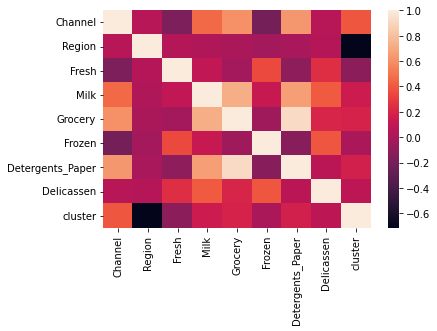

In [17]:
sns.heatmap(data.corr())

In [12]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
cluster             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


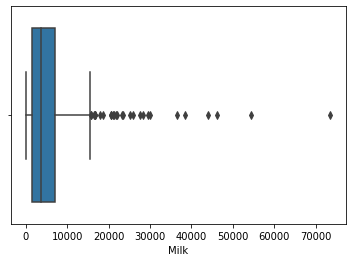

In [20]:
sns.boxplot(data['Milk'])

In [4]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Lets take number of clusters as 3 and find the inertia

In [6]:
model = KMeans(n_clusters=3)

model.fit(scaled_df)
model.inertia_

2149.283956221758

to find the optimal number of clusters

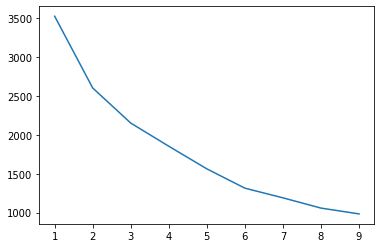

In [24]:
clusters = range(1, 10)
inertia =[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster)

    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.plot(clusters, inertia)

from the graph, we can choose the optimum number of clusters as 4

In [25]:
model = KMeans(n_clusters=4)

model.fit(scaled_df)

KMeans(n_clusters=4)

In [27]:
print("the model has an inertia of ", model.inertia_)
print("the centeroids are", model.cluster_centers_)

pred = model.predict(scaled_df)
data['predicted'] = model.predict(scaled_df)
print('\nCount in each cluster: \n', data['predicted'].value_counts())

the model has an inertia of  1851.8408722743848
the centeroids are [[-0.57404987 -1.58776439  0.0322041  -0.32480994 -0.39159364  0.20835612
  -0.42347134 -0.11589632]
 [ 1.1195826   0.09335859  1.09004412  3.98320348  3.58457916  0.77799282
   3.56664129  2.25618179]
 [-0.69029709  0.59066829  0.10271946 -0.35647922 -0.44358724  0.07527901
  -0.44349195 -0.09313733]
 [ 1.44865163  0.1699285  -0.30636283  0.41750021  0.65187952 -0.3572697
   0.67684797  0.00633175]]

Count in each cluster: 
 2    209
3    126
0     92
1     13
Name: predicted, dtype: int64


Applying PCA

In [28]:
print("the cluster having most number of points is 2")

the cluster having most number of points is 2


In [37]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_df)

In [38]:
print(pca_data)

[[ 0.84393893 -0.51535075 -0.76763222 -0.0442148 ]
 [ 1.06267645 -0.48460126 -0.67297526  0.40137178]
 [ 1.26914052  0.68205455 -0.6640946   1.63495276]
 ...
 [ 3.86514909 -0.47985376 -0.52534452 -0.68713197]
 [-1.09706738 -0.06989568 -0.63012755  0.31182088]
 [-1.16595067 -0.90215675 -0.59770486  0.34265555]]


do clustering on transformed data

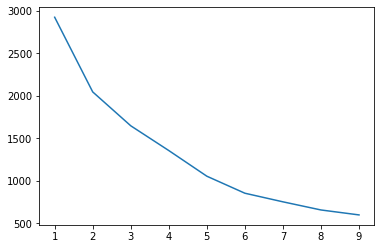

In [39]:
clusters = range(1, 10)
inertia =[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster)

    model.fit(pca_data)
    inertia.append(model.inertia_)

plt.plot(clusters, inertia)

by analysing the graph, we can find that the optimal number of centeroids is 5

In [43]:
model1 = KMeans(n_clusters=5)

model1.fit(scaled_df)

KMeans(n_clusters=5)

In [45]:
print("the model has an inertia of ", model1.inertia_)
print("the centeroids are", model1.cluster_centers_)

pred2 = model1.predict(scaled_df)
data['predicted2'] = model1.predict(scaled_df)
print('\nCount in each cluster: \n', data['predicted2'].value_counts())

the model has an inertia of  1541.2223189373358
the centeroids are [[ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.80111616e-01  5.90668285e-01  1.12663617e-01 -3.55978165e-01
  -4.42978026e-01  7.32433363e-02 -4.43738312e-01 -9.14933607e-02]
 [-1.55559907e-01  2.67416985e-01  3.16804122e+00  3.51326433e+00
   1.11031138e+00  5.51716255e+00 -3.83193146e-02  6.43664422e+00]
 [ 1.44865163e+00  1.66562579e-01 -3.26341681e-01  4.22850268e-01
   6.59619766e-01 -3.57310160e-01  6.86224579e-01  4.36563167e-03]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01]]

Count in each cluster: 
 1    210
3    125
4     91
0     10
2      4
Name: predicted2, dtype: int64
